# Домашняя работа № 2
### студентки БКЛ-213 Быковой Валерии

## Задание 1
Предварительная обработка 11 книжек Александра Беляева.

In [1]:
# импортирую модуль os для того, чтобы считать все из папки с книжками
import os

Считываю в список тексты всех книжек.

In [2]:
all_books = []
path = "./books/"
for el in os.listdir(path):
    if os.path.isfile(path + "/" + el) and el[0] != ".":
        with open(path + "/" + el, "r", encoding="utf-8") as f:
            data = f.read()
            all_books.append(data)

Импортирую Mystem для обработки текста. 

In [3]:
from pymystem3 import Mystem

Создаю экземпляр класса Mystem.

In [4]:
m = Mystem()

In [5]:
from tqdm import tqdm

Привожу все тексты к лемматизированному виду, записываю их в один файл для удобства работы.

In [6]:
with open("book_lemmas.txt", "w", encoding="UTF-8") as f:
    for text in tqdm(all_books):
        lemmas = m.lemmatize(text)
        for lemma in lemmas:
            f.write(lemma)

100%|██████████| 11/11 [00:16<00:00,  1.50s/it]


Импортирую nltk, его инструменты и стоп-слова для очистки текста и записи по предложениям. Импортирую pymorphy

In [7]:
import nltk

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [9]:
nltk.download("stopwords")
sw = nltk.corpus.stopwords.words("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valeriabykova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

Создаю функцию, которая решает, оставлять ли слово в тексте

In [11]:
def to_leave(word: str):
    word = word.lower()
    if not word.isalpha():
        return False
    if word in sw:
        return False
    stop_pos = {"PREP", "CONJ", "PRCL", "INTJ", "NPRO"}
    ana = morph.parse(word)
    first = ana[0]
    if first.tag.POS in stop_pos:
        return False
    return True

Токенизирую, очищаю от стоп-слов и не-слов, записываю в список

In [12]:
with open("book_lemmas.txt", "r", encoding="utf-8") as file:
    text = file.read()
splited_text = []
sep_sentences = [word_tokenize(t) for t in tqdm(sent_tokenize(text))]
for el in tqdm(sep_sentences):
    tokenized_text = [w.lower() for w in el if to_leave(w)]
    splited_text.append(tokenized_text)

100%|██████████| 41331/41331 [00:16<00:00, 2471.55it/s]


Из списка записываю в читаемый моделью формат файла

In [13]:
with open("final_text.txt", "w", encoding="utf-8") as file:
    for sentence in splited_text:
        line = " ".join(sentence) + "\n"
        file.write(line)

## Задание 2.

Импортирую модули для работы с моделью

In [14]:
!pip3 install gensim

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [15]:
import gensim
import logging

import warnings

warnings.filterwarnings("ignore")

Формирую лог действий, чтобы отслеживать происходящее.

In [16]:
logging.basicConfig(
    format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO
)

Даю модели файл в нужном формате на вход.

In [78]:
f = "final_text.txt"
data = gensim.models.word2vec.LineSentence(f)

1. Обучаю модель с нужными параметрами.

In [79]:
model = gensim.models.Word2Vec(
    data,
    vector_size=300,
    window=5,
    min_count=5,
    epochs=50)

2022-11-14 21:32:20,870 : INFO : collecting all words and their counts
2022-11-14 21:32:20,872 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-14 21:32:20,894 : INFO : PROGRESS: at sentence #10000, processed 63811 words, keeping 9841 word types
2022-11-14 21:32:20,914 : INFO : PROGRESS: at sentence #20000, processed 122542 words, keeping 13149 word types
2022-11-14 21:32:20,934 : INFO : PROGRESS: at sentence #30000, processed 182147 words, keeping 15990 word types
2022-11-14 21:32:20,953 : INFO : PROGRESS: at sentence #40000, processed 239070 words, keeping 18220 word types
2022-11-14 21:32:20,954 : INFO : collected 18295 word types from a corpus of 242235 raw words and 40482 sentences
2022-11-14 21:32:20,955 : INFO : Creating a fresh vocabulary
2022-11-14 21:32:20,967 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 6653 unique words (36.37% of original 18295, drops 11642)', 'datetime': '2022-11-14T21:32:20.967436', 'gensim': 

2. Размер получившейся модели.

In [80]:
f"Размер модели: {len(model.wv.key_to_index)} слова"

'Размер модели: 6653 слова'

3. 10 самых близких слов к имени персонажа _Ариэль_.

In [20]:
for el, st in model.wv.most_similar("ариэль", topn=10):
    print(el)

шарада
пирс
раджа
мохит
джейн
шьям
лолита
цыпленок
раджин
летать


10 самых близких слов к абстрактному понятию _смерть_.

In [21]:
for el, st in model.wv.most_similar("смерть", topn=10):
    print(el)

гибель
лгать
герой
удушье
внезапный
обреченный
ложь
разорение
обрекать
мучительный


10 самых близких слов к антонимам _низкий_ и _высокий_.

In [22]:
for el, st in model.wv.most_similar("низкий", topn=10):
    print(el)

средний
градус
одинаковый
ровный
температура
направо
ступень
метеор
тембр
рост


In [23]:
for el, st in model.wv.most_similar("высокий", topn=10):
    print(el)

сложенный
каста
отделять
наблюдательный
эффектный
кактус
подножие
возвышаться
низкий
цветной


5. Найдем лишнее слово из ряда.
Здесь модель справляется.

In [24]:
extra = model.wv.doesnt_match("ненависть смерть грусть еда".split())
print(f"Лишнее слово – {extra}.")

Лишнее слово – еда.


## Задание 3.1.

Импортируем модули для загрузки модели. WGET закомментирован, так как строка, использующая его, тоже закомментирована, а flake8 ругается.

In [25]:
import zipfile
# import wget

Скачиваем модель (сама загрузка закомментирована, так как ноутбук выполнялся больше одного раза.)

In [71]:
model_url = "http://vectors.nlpl.eu/repository/20/220.zip"
# m = wget.download(model_url)
model_file = model_url.split("/")[-1]
with zipfile.ZipFile(model_file, "r") as archive:
    archive.extractall()
    model_1 = gensim \
        .models \
        .KeyedVectors \
        .load_word2vec_format("model.bin", binary=True)

2022-11-14 21:29:54,526 : INFO : loading projection weights from model.bin
2022-11-14 21:29:55,530 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (249333, 300) matrix of type float32 from model.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-11-14T21:29:55.530102', 'gensim': '4.2.0', 'python': '3.9.13 (main, May 24 2022, 21:13:51) \n[Clang 13.1.6 (clang-1316.0.21.2)]', 'platform': 'macOS-12.3.1-arm64-arm-64bit', 'event': 'load_word2vec_format'}


Решение семантической пропорции: жена - женщина + мужчина = муж. Ответ модели верный.

In [65]:
print(
    model_1.most_similar(
        positive=["жена_NOUN", "мужчина_NOUN"], negative=["женщина_NOUN"]
    )[0][0]
)

муж_NOUN


Устанавливаем matplotlib для визуализации.

In [28]:
!pip3 install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Импортируем средства для работы с PCA и визуализацией.

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [66]:
words = [
    "кошка_NOUN",
    "собака_NOUN",
    "корова_NOUN",
    "бык_NOUN",
    "индюк_NOUN",
    "тигр_NOUN",
    "волк_NOUN",
]
X = model_1[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

Строим график. Вышло в целом логично: кошка и собака рядом, волк и тигр как дикие животные – рядом, корова ближе всего к быку.

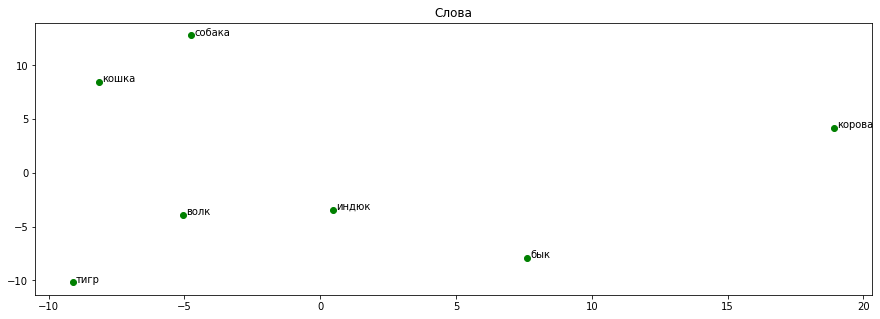

In [67]:
plt.figure(figsize=(15, 5))
plt.scatter(coords[:, 0], coords[:, 1], color="green")
plt.title("Слова")

for i, word in enumerate(words):
    word_show = word.split(sep="_")[0]
    t, y = coords[i, 0], coords[i, 1]
    plt.annotate(word_show, xy=(t, y), xytext=(t + 0.1, y))
plt.show()

Заменим в предложении все не стоп-слова на ближайших соседей.

In [88]:
s = """
Я зашел в кафе, съел два бутерброда с ветчиной и теперь тянул коньяк,
запивая его  кофе.
"""

In [89]:
lemmas_s = m.lemmatize(s)
tokenized_s = [w.lower() for w in lemmas_s if to_leave(w)]

In [105]:
for word in tokenized_s:
    ana = morph.parse(word)
    first = ana[0]
    word_tag = word + '_' + str(first.tag).split(sep=',')[0]
    if 'INFN' in word_tag:
        word_tag = word_tag.replace('INFN', 'VERB')
    if word_tag in model_1.key_to_index:
        print(model_1.most_similar(word_tag)[0])
    else:
        print(word_tag)

('заходить_VERB', 0.7825347185134888)
('ресторан_NOUN', 0.8710845708847046)
('съесть_VERB', 0.7796281576156616)
('пирожок_NOUN', 0.7043185234069824)
('сосиска_NOUN', 0.7305837273597717)
('потянуть_VERB', 0.7400533556938171)
('бренди_NOUN', 0.7616719007492065)
('выпивать_VERB', 0.7006803750991821)
('чай_NOUN', 0.8139259815216064)


Ответ на задание: Я заходил в ресторан, съел два пирожка с сосиской, и теперь потянул бренди, выпивая чай.

Получилось не очень грамматично, потому что инфинитивы глаголов _съел_ и _тянул_ определены неправильно.

## Задание 3.2.

Выполняем предобработку текста. Выделяем из самих статей в html только текст без тегов, исключаем числа, стоп-слова (из nltk и по части речи).

In [32]:
from bs4 import BeautifulSoup
import requests

In [33]:
with open('links.txt', 'r', encoding='utf-8') as file:
    links = file.read()

In [34]:
articles = []
article_names = []
for link in tqdm(links.split(sep='\n')):
    *_, name = link.split('/')
    text = requests.get(link).text
    html = BeautifulSoup(text)
    text = "\n".join(p.text for p in html.find_all('p'))
    lemmas_par = m.lemmatize(text)
    tokenized_par = [w.lower() for w in lemmas_par if to_leave(w)]
    tokenized_par = ' '.join(tokenized_par)
    articles.append(tokenized_par)
    article_names.append(name)

100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


Импортируем средство для работы с tf-idf.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

Запускаем tf-idf с нужными параметрами.

In [36]:
tfidf = TfidfVectorizer(
    analyzer="word",
    ngram_range=(1, 3),
    min_df=3
)

Проверяем, что обработано нужное количество документов.

In [37]:
articles_tfidf = tfidf.fit_transform(articles)
print(
    f"Матрица на {articles_tfidf.shape[0]} \
    документов и {articles_tfidf.shape[1]} \
    термов"
)

Матрица на 20     документов и 4708     термов


Импортируем numpy для работы с tf-idf.

In [38]:
import numpy as np

Функция для получения топа слов для каждой статьи.

In [39]:
def get_top_tf_idf_words(tfidf_vector, feature_names, top_n):
    sorted_nzs = np.argsort(tfidf_vector.data)[:-(top_n+1):-1]
    return feature_names[tfidf_vector.indices[sorted_nzs]]

Выводим топ-5 слов для каждой статьи. Результаты вышли ожидаемыми, они соотносятся с текстом статей.

In [40]:
feature_names = np.array(tfidf.get_feature_names())

for i, article in enumerate(articles):
    article_vector = articles_tfidf[i, :]
    words = get_top_tf_idf_words(article_vector, feature_names, 5)
    print_words = ', '.join(words)
    print(f'Топ-5 слов для статьи {article_names[i]}: {print_words}.')

Топ-5 слов для статьи Токио: год, столица, японский, япония, город.
Топ-5 слов для статьи Москва: москва, год, московский, город, тысяча.
Топ-5 слов для статьи Златоуст: год, город, завод, область, уральский.
Топ-5 слов для статьи Россия: россия, год, российский, страна, тыс.
Топ-5 слов для статьи Германия: германия, год, земля, немой, федеральный.
Топ-5 слов для статьи Соединённые_Штаты_Америки: сша, штат, год, страна, соединять.
Топ-5 слов для статьи Суахили: класс, язык, in, арабский, показатель.
Топ-5 слов для статьи Эсперанто: язык, год, международный, интернет, la.
Топ-5 слов для статьи Татарский_язык: язык, гласный, казанский, диалект, литературный.
Топ-5 слов для статьи Великая_французская_революция: король, год, сословие, париж, фр.
Топ-5 слов для статьи Франция: франция, год, французский, страна, париж.
Топ-5 слов для статьи Торонто: город, канада, год, метро, канадский.
Топ-5 слов для статьи Аддис-Абеба: город, эфиопия, год, столица, мэр.
Топ-5 слов для статьи Амхарский_язык

Понижаем размерность с помощью PCA. При этом переводим `articles_tfidf` из sparsed в dense, так как PCA этого требует.

In [41]:
visual = PCA(2).fit_transform(articles_tfidf.todense())

С помощью matplotlib строю график. Получается не очень красиво из-за длинных названий статей, но в материалах визуализируют так же. Нагуглить что-то красивое именно для таких графиков не вышло. Визуализация вышла ожидаемой: по группам собрались языки, города, страны и исторические события. Выбивается только "Великая депрессия", которая ближе к странам, а не к событиям.

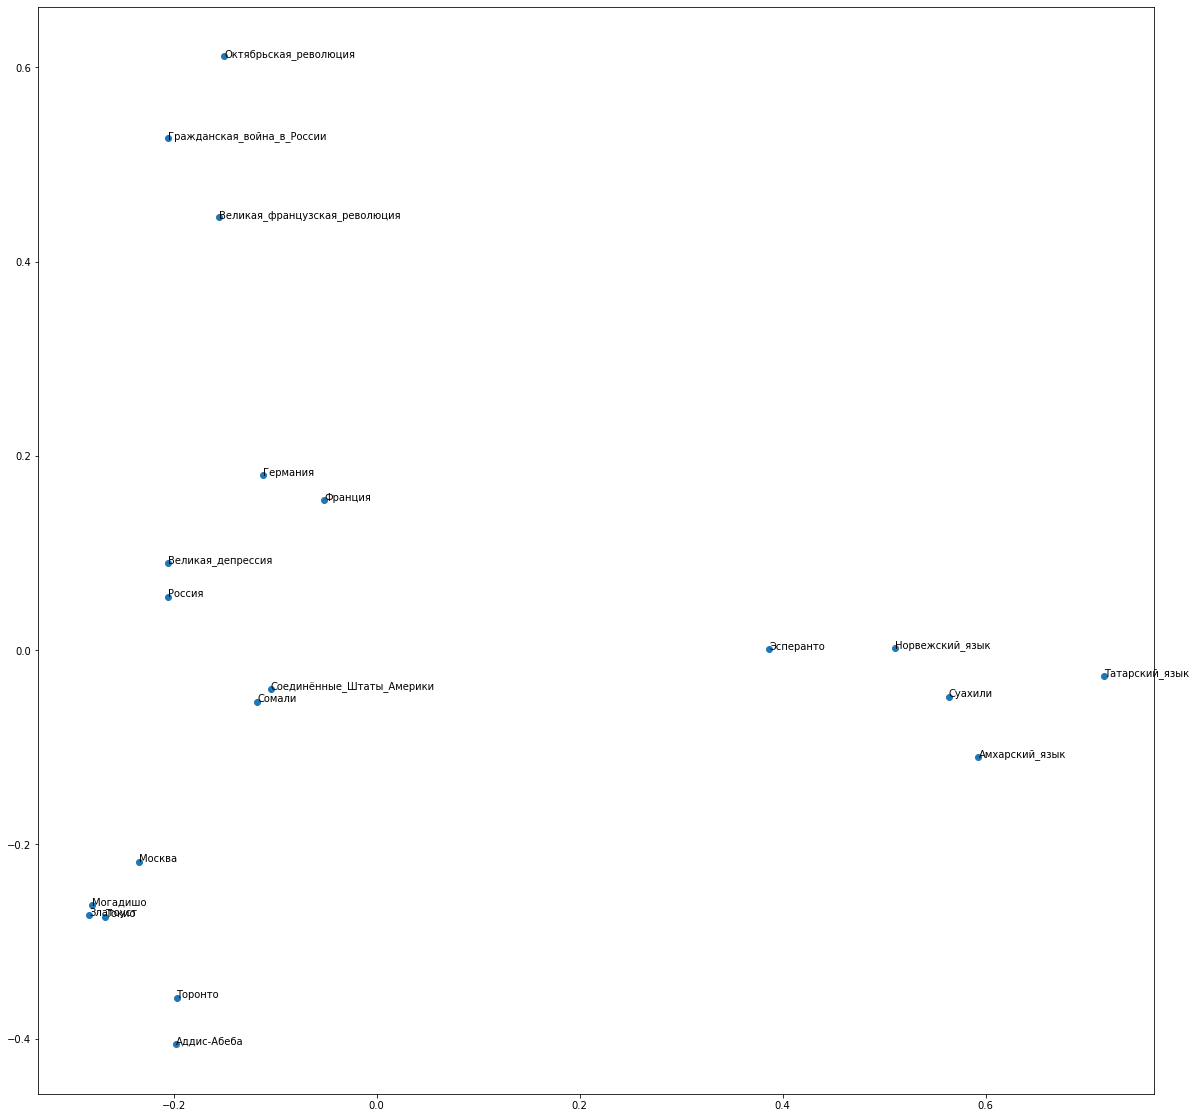

In [42]:
plt.figure(figsize=(20, 20))
plt.scatter(visual[:, 0], visual[:, 1])
for i, name in enumerate(article_names):
    t, y = visual[i, 0], visual[i, 1]
    plt.annotate(name, xy=(t, y), xytext=(t, y))
plt.show()

## 4 задание 

1. Я подавала в функцию текст уже без чисел, убирая их при лемматизации. Тем не менее, можно задать регулярное выражение внутри token_pattern, чтобы оно не учитывало цифры.

In [43]:
tfidf_test = TfidfVectorizer(
    analyzer="word",
    ngram_range=(1, 1),
    min_df=1,
    token_pattern=r'[^\d ]+'
)

Создаем список, который хотим очистить от чисел.

In [44]:
data = ['1 собака', '15 кошек', 'стол', '9 песик']

Учим на новых данных.

In [45]:
tfidf_test.fit_transform(data)

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

Выводим результат.

In [46]:
features = np.array(tfidf_test.get_feature_names())

In [47]:
features

array(['кошек', 'песик', 'собака', 'стол'], dtype='<U6')

2. Расчитываем косинусную близость, импортируем инструмент, считаем.

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
articles_sim = cosine_similarity(articles_tfidf)

Сортируем результат для статьи про Токио по убыванию, выводим первые 5 статей.

In [50]:
rating = articles_sim[0].argsort()[::-1][1:6]

In [51]:
print(f'Топ-5 самых близких к статье "{article_names[0]}" статей.')
for r, i in enumerate(rating):
    print(f'{r + 1}.{article_names[i]}')

Топ-5 самых близких к статье "Токио" статей.
1.Златоуст
2.Россия
3.Могадишо
4.Великая_депрессия
5.Аддис-Абеба


3. Импортируем seaborn, строим график. Как мне кажется, кластеризация вышла хорошо: в группы собрались города,  исторические события, страны и языки. Великая французская революция рядом с Францией, великая депрессия  – рядом с США. Разве что Сомали оказался ближе к городам, чем к странам.

In [52]:
import seaborn

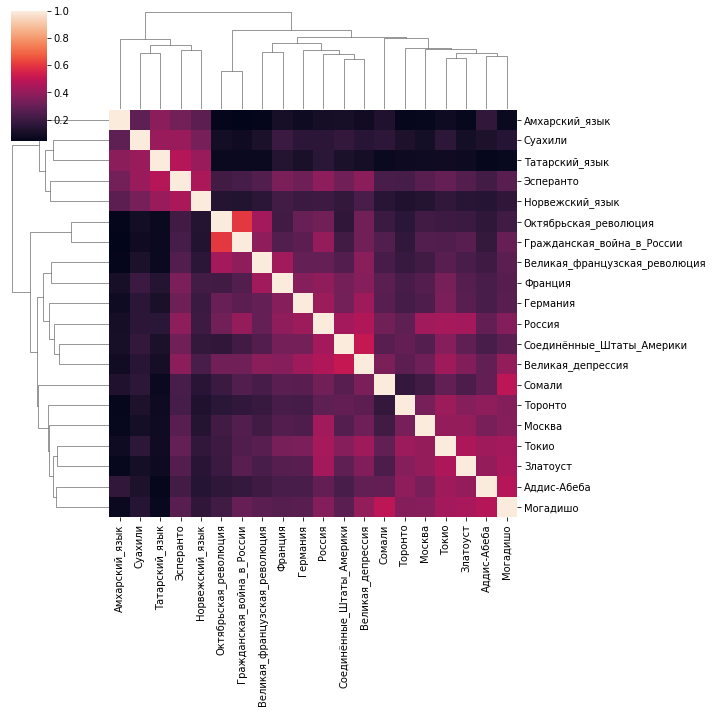

In [53]:
seaborn.clustermap(
    articles_sim,
    xticklabels=[article_names[i] for i in range(20)],
    yticklabels=[article_names[i] for i in range(20)]
)